In [ ]:
!pip uninstall -y tensorflow-gpu
!pip install -U pip setuptools wheel
!pip install -U tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 48.4 MB/s  0:00:11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 160.4 MB/s  0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [tensorflow]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensor

In [ ]:
!pip uninstall -y tensorflow tf-keras tensorflow-text tensorflow-decision-forests
!pip install "tensorflow==2.19.*" "tf-keras==2.19.*" "tensorflow-text==2.19.*" "tensorflow-decision-forests==1.12.*"
# restart runtime after install

Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: tf_keras 2.19.0
Uninstalling tf_keras-2.19.0:
  Successfully uninstalled tf_keras-2.19.0
Found existing installation: tensorflow-text 2.19.0
Uninstalling tensorflow-text-2.19.0:
  Successfully uninstalled tensorflow-text-2.19.0
Found existing installation: tensorflow_decision_forests 1.12.0
Uninstalling tensorflow_decision_forests-1.12.0:
  Successfully uninstalled tensorflow_decision_forests-1.12.0
  Using cached tensorflow-2.19.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_text-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached tensorflow_decision_forests-1.12.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached tensorflow-

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [42]:
dataset= pd.read_csv('/content/Churn_Modelling.csv')

In [43]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
X= dataset.iloc[:, 3:13] #Independent
Y = dataset.iloc[:,13] #Dependent

In [45]:
### Feature Engineering
geography=pd.get_dummies(X['Geography'], drop_first=True) #One-hot encoding
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [46]:
### COncatenate these variables with the dataframe
X=X.drop(['Geography', 'Gender'], axis=1) # axis=1 because we need to drop the col not the row!
#X=X... because we are updating value of X

In [47]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [48]:
X = pd.concat([X, geography, gender], axis=1)

In [49]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [50]:
### Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [51]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
### Lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [70]:
### initialise ANN
classifier = Sequential()
### adding the input layer
classifier.add(Dense(units = 11, activation='relu'))
### adding the first hidden layer
classifier.add(Dense(units = 7, activation='relu'))
classifier.add(Dropout(0.3))
### adding the second hidden layer
classifier.add(Dense(units = 6, activation='relu'))
### adding output layer
classifier.add(Dense(units =1, activation='sigmoid'))

In [71]:
###  train my neural network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # by default adam uses a learning rate of .01%

In [72]:
### create our own learning rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
## Early stopping
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(
        monitor='val_loss',  # Metric to monitor (e.g., validation loss)
        patience=5,          # Number of epochs with no improvement after which training will be stopped
        min_delta=0.001,     # Minimum change in the monitored quantity to qualify as an improvement
        mode='auto',   # 'min' for metrics like loss (lower is better), 'max' for metrics like accuracy (higher is better)
        verbose =1,
        restore_best_weights=True # Restores model weights from the epoch with the best value of the monitored quantity
    )

In [74]:
### train the model
model_history = classifier.fit(X_train, Y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks = [early_stop])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7955 - loss: 0.4853 - val_accuracy: 0.8326 - val_loss: 0.4100
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8321 - loss: 0.4026 - val_accuracy: 0.8463 - val_loss: 0.3715
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8348 - loss: 0.3942 - val_accuracy: 0.8459 - val_loss: 0.3796
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8499 - loss: 0.3811 - val_accuracy: 0.8410 - val_loss: 0.3791
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8529 - loss: 0.3583 - val_accuracy: 0.8463 - val_loss: 0.3693
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8546 - loss: 0.3572 - val_accuracy: 0.8417 - val_loss: 0.3681
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8556 - loss: 0.3586 - val_accuracy: 0.8516 - val_loss: 0.3565
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8550 - loss: 0.3505 - val_accu

In [77]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

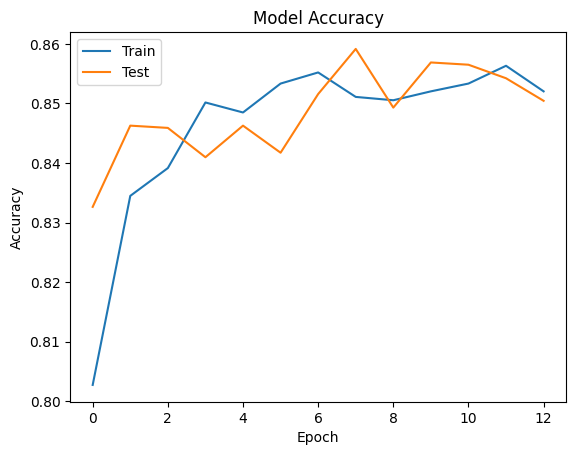

In [78]:
### summarise model history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

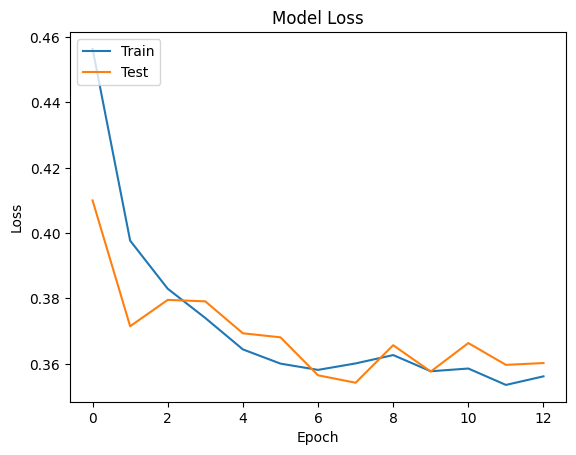

In [79]:
### plot for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [80]:
### prediction on test data
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [81]:
### make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, y_pred)
cm

array([[1534,   61],
       [ 207,  198]])

In [82]:
### Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test, y_pred)
score

0.866

In [83]:
### get the weights
classifier.get_weights()

[array([[ 5.36148176e-02, -2.41149053e-01, -3.34875196e-01,
         -1.80812418e-01,  1.80219516e-01,  1.22699484e-01,
         -2.95834541e-02, -5.34401834e-02, -1.20629586e-01,
          6.50525868e-01, -6.60153106e-04],
        [-1.40224361e+00,  3.64465117e-01, -4.69240427e-01,
          1.04780650e+00,  3.58353287e-01,  4.93410558e-01,
         -7.41799653e-01,  4.37033102e-02, -1.69894248e-01,
         -7.65654385e-01, -1.67865121e+00],
        [ 1.44461364e-01,  1.19182698e-01,  5.73043048e-01,
          1.89627662e-01,  1.55538604e-01, -7.33694881e-02,
         -6.37150034e-02,  1.32735938e-01,  1.29599884e-01,
          1.16934963e-01, -7.77040273e-02],
        [-2.65736014e-01, -7.86672533e-01, -3.79477531e-01,
         -4.16319013e-01, -6.63503110e-02,  1.31814075e+00,
          2.31884673e-01,  5.64010665e-02,  6.89913154e-01,
         -1.03542995e+00,  9.03890654e-02],
        [ 2.76890606e-01, -2.29812956e+00,  3.24550658e-01,
          6.05732687e-02,  1.00765646e+00,  